In [7]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.style as style
import time

In [18]:
style.use('fivethirtyeight')
imputed = 'PATIENT_DATA_ALL_3.csv'
non_imputed = 'filename_2.txt'

In [19]:
#merged = np.genfromtxt(imputed, delimiter='\t')
merged = pd.read_csv(imputed, sep='\t', )
labels = pd.read_csv('OLD_DATA/data_clinical_sample_clean.tsv', sep='\t')

In [20]:
labels.set_index('SAMPLE_ID', inplace=True)
labels.drop(['Unnamed: 0'], axis=1, inplace=True)

In [21]:
merged.drop('PATIENT_ID', axis=1,inplace=True)
#merged.drop('SAMPLE_ID', axis=1,inplace=True)
merged.drop(['Unnamed: 0'], axis=1,inplace=True)
#merged = merged.transpose()

labels = labels['ONCOTREE_CODE']
result = pd.concat([merged, labels], axis=1)

#labels = result['ONCOTREE_CODE']
#labels.columns.values[1] = 'c'

/Users/egeozin/miniconda2/envs/mm-env/lib/python3.5/site-packages/pandas/core/indexes/range.py:433: RuntimeWarning: unorderable types: int() < str(), sort order is undefined for incomparable objects
  return self._int64index.union(other)


In [337]:
random_indices = np.random.permutation(len(X))

In [338]:
X_randomized = merged.iloc[random_indices]
Y_randomized = labels[:-1].iloc[random_indices]

In [339]:
X = X_randomized.as_matrix() 
Y = Y_randomized

In [26]:
merged

,SAMPLE_ID,AGE_AT_DIAGNOSIS_GROUP,CALC_TIME_TO_METS_DX_DAYS,HORMONE_RECEPTOR_STATUS,HER2_STATUS_REPORTED,TRIPLE_NEG_STATUS,INFLAMMATORY_STATUS,HISPANIC,RACE_CATEGORIZED,T_STAGE_REPORTED,...,BX_TIME_DAYS,BX_LOCATION,BX_SIDEDNESS_BREAST,BX_TYPE,BX_DCIS,BX_LCIS,BX_GRADE,BX_ER,BX_PR,BX_HER2OVERALL
0,MBC-MBCProject_1ps2hZH8-Tumor-SM-DL4OO,4,0,1,1,0,0,1,0,3,...,0,2,1,2,0,0,2.0,1,1,1
1,MBC-MBCProject_1qhlIasw-Tumor-SM-AXGNH,3,2175,1,0,0,0,0,0,2,...,0,2,1,4,1,0,2.0,1,1,-1
2,MBC-MBCProject_27uAugT4-Tumor-SM-DL45T,1,503,1,0,0,0,1,0,3,...,41,2,1,4,0,0,3.0,-1,-1,-1
3,MBC-MBCProject_3jhES9fq-Tumor-SM-AXGIU,5,1,1,0,0,0,0,0,1,...,1,2,2,3,0,0,1.5,-1,-1,-1
4,MBC-MBCProject_3LI1TNs3-Tumor-SM-DL43B,1,14,1,1,0,0,0,0,3,...,0,2,1,2,0,0,2.0,1,1,1
5,MBC-MBCProject_3MUnT7Ty-Tumor-SM-CGLLE,5,3948,1,0,1,0,0,0,2,...,43,2,1,4,0,1,3.0,1,1,-1
6,MBC-MBCProject_4DIpSBFV-Tumor-SM-CGM2Q,6,0,1,1,0,0,0,2,1,...,0,2,1,2,0,0,2.0,1,-1,1
7,MBC-MBCProject_4MF1FlFQ-Tumor-SM-CGM4M,2,4,1,0,0,0,0,0,1,...,0,2,1,2,0,0,3.0,1,1,-1
8,MBC-MBCProject_4MF1FlFQ-Tumor-SM-AZ5CU,2,4,1,0,0,0,0,0,1,...,114,2,1,4,1,0,2.0,1,-1,1
9,MBC-MBCProject_4OIOfAt9-Tumor-SM-CGLYL,2,0,1,0,0,0,0,0,3,...,293,2,2,4,1,0,3.0,-1,-1,-1


In [340]:
X_train, y_train = X[:70], Y[:70]
X_test, y_test = X[70:], Y[70:]

In [318]:
X_train.shape

(70, 106)

Dataset 2CN, train_samples=70, n_features=106, n_classes=4
Using l1 regression
[model=One versus Rest, solver=liblinear] Number of epochs: 1
[model=One versus Rest, solver=liblinear] Number of epochs: 3
Test accuracy for model ovr: 0.4688
Train accuracy for model ovr: 0.7714
% non-zero coefficients for model ovr, per class:
 [ 22.64150943  25.47169811  19.81132075  16.03773585]
Run time (3 epochs) for model ovr:0.00
Example run in 0.099 s


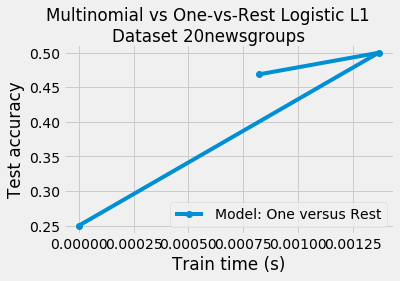

In [345]:
# Turn down for faster run time

n_samples = 10000

t0 = time.clock()

penalty = 'l1'

train_samples, n_features = X_train.shape
n_classes = np.unique(Y).shape[0]

print('Dataset 2CN, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 3]},
          'multinomial': {'name': 'Multinomial', 'iters': [1, 3, 7]}}

# Solver which handles multiclass and l1 penalty
solver = 'newton-cg'

if penalty == 'l1':
    print('Using l1 regression')
    models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 3]}}
    solver = 'liblinear'
    
for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    tr_accuracies = [1/n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params['iters']:
        print('[model=%s, solver=%s] Number of epochs: %s' %
              (model_params['name'], solver, this_max_iter))
        lr = LogisticRegression(solver=solver,
                                multi_class=model,
                                C=1,
                                penalty=penalty,
                                fit_intercept=True,
                                max_iter=this_max_iter,
                                random_state=42,
                                )
        t1 = time.clock()
        lr.fit(X_train, y_train)
        train_time = time.clock() - t1
        times.append(train_time)
        tr_accuracy = np.sum(y_train == lr.predict(X_train)) / y_train.shape[0]

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        tr_accuracies.append(tr_accuracy)
        densities.append(density)
        
    models[model]['times'] = times
    models[model]['densities'] = densities
    models[model]['accuracies'] = accuracies
    models[model]['tr_accuracies'] = tr_accuracies
    print('Test accuracy for model %s: %.4f' % (model, accuracies[-1]))
    print('Train accuracy for model %s: %.4f' % (model, tr_accuracies[-1]))
    print('%% non-zero coefficients for model %s, '
          'per class:\n %s' % (model, densities[-1]))
    print('Run time (%i epochs) for model %s:'
          '%.2f' % (model_params['iters'][-1], model, times[-1]))

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]['name']
    times = models[model]['times']
    accuracies = models[model]['accuracies']
    ax.plot(times, accuracies, marker='o',
            label='Model: %s' % name)
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Test accuracy')
ax.legend()
fig.suptitle('Multinomial vs One-vs-Rest Logistic L1\n'
             'Dataset %s' % '20newsgroups')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = time.clock() - t0
print('Example run in %.3f s' % run_time)
plt.show()

In [344]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])